# Import Packages

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
try:
    df = pd.read_csv('DataClients.csv', parse_dates=['CreatedDate', 'SubmittedDate', 'ApprovedRejectedDate'],\
                 dayfirst=True) #Incase data is parsed properly
except:
    df = pd.read_csv('DataClients.csv', sep = '\t', parse_dates=['CreatedDate', 'SubmittedDate', 'ApprovedRejectedDate'],\
                 dayfirst=True) #Incase all the data is in 1 column

# Feature Engineering

In [3]:

df['TimetoSubmit'] = (df['SubmittedDate'] - df['CreatedDate']).dt.days #Time takn to Submit the application
df['TimetoApprove'] = (df['ApprovedRejectedDate'] - df['SubmittedDate']).dt.days #Time taken to approve the application
df['month_year'] = pd.to_datetime(df['CreatedDate']).dt.to_period('M') #Extract year and month from created date column
df = pd.get_dummies(df, columns=['Registration Status']) #Create seperate column for each value in registration status

# Historic monthly profiles created

<AxesSubplot:xlabel='month_year'>

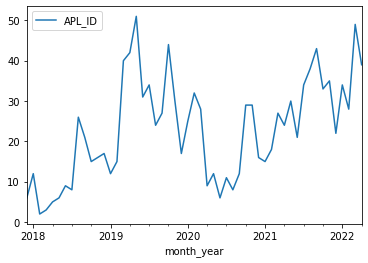

In [4]:
volume = df.groupby(['month_year'])['APL_ID'].count().reset_index()
volume.plot( 'month_year' , 'APL_ID' )

The Trend is generally increasing with a drop in 2020

# Efficiency to Submit and Approve over a period of time

In [5]:
efficiency = df.groupby(['month_year'])['TimetoSubmit', 'TimetoApprove'].mean().reset_index()


<AxesSubplot:xlabel='month_year'>

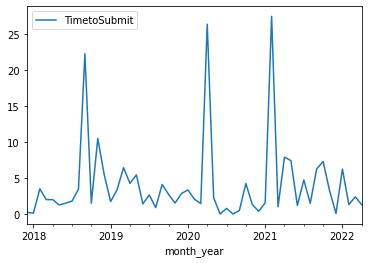

In [6]:
efficiency.plot( 'month_year' , 'TimetoSubmit' )

Average time to submit the application has been improved much. Additionally, there is a peak month every year

<AxesSubplot:xlabel='month_year'>

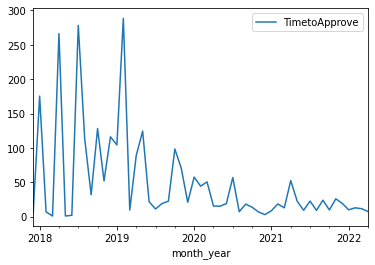

In [7]:
efficiency.plot( 'month_year' , 'TimetoApprove' )

However, average time to approve the application has improved significantly since inception

# Countries wise registration status

In [8]:
countrieskyc = df.groupby(['CountryOfOperation'])['Registration Status_KYCApproved', 'Registration Status_KYCReady',\
                         'Registration Status_KYCRejected', 'Registration Status_New', 'Registration Status_NotProceeded',\
                         'Registration Status_OnHold', 'Registration Status_PreReg', 'Registration Status_Submitted'].sum()
countrieskyc

,Registration Status_KYCApproved,Registration Status_KYCReady,Registration Status_KYCRejected,Registration Status_New,Registration Status_NotProceeded,Registration Status_OnHold,Registration Status_PreReg,Registration Status_Submitted
CountryOfOperation,,,,,,,,
Australia,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Barbados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Canada,29.0,4.0,23.0,3.0,0.0,24.0,0.0,1.0
France,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Germany,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hong Kong,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Ireland,143.0,0.0,72.0,3.0,0.0,34.0,4.0,2.0
Japan,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It seems the major markets are UK and Ireland

In [9]:
countrieskycproportion = countrieskyc.div(countrieskyc.sum(axis=1), axis=0)
countrieskycproportion

,Registration Status_KYCApproved,Registration Status_KYCReady,Registration Status_KYCRejected,Registration Status_New,Registration Status_NotProceeded,Registration Status_OnHold,Registration Status_PreReg,Registration Status_Submitted
CountryOfOperation,,,,,,,,
Australia,0.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
Barbados,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Belgium,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000
Canada,0.345238,0.047619,0.273810,0.035714,0.000000,0.285714,0.000000,0.011905
France,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
Germany,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hong Kong,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
Ireland,0.554264,0.000000,0.279070,0.011628,0.000000,0.131783,0.015504,0.007752
Japan,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


High % of application getting rejected in Hong Kong and Singapore although there absolute number is small.

# Average time to submit and approve the application by countries and application processed per country

In [10]:
countries = df.groupby('CountryOfOperation').agg({'TimetoSubmit':'mean', 'TimetoApprove':'mean','APL_ID':'count'})
countries

,TimetoSubmit,TimetoApprove,APL_ID
CountryOfOperation,,,
Australia,0.400000,8.000000,6
Barbados,4.000000,15.000000,1
Belgium,0.000000,12.000000,3
Canada,3.237288,30.166667,84
France,0.000000,12.000000,2
Germany,1.000000,0.000000,1
Hong Kong,0.000000,9.500000,2
Ireland,4.967914,54.546053,258
Japan,0.000000,6.500000,2


# Average time to submit and approve the application by resources and application processed per resource

In [11]:
resource = df.groupby('OnbardingCaseWorker').agg({'TimetoSubmit':'mean', 'TimetoApprove':'mean','APL_ID':'count'})
resource

,TimetoSubmit,TimetoApprove,APL_ID
OnbardingCaseWorker,,,
Anna,0.000000,13.000000,1
Ben,2.418605,26.368421,61
Chris,NaN,NaN,2
Ciara,1.272727,12.333333,19
Denis,0.000000,0.000000,2
Erika,4.021097,40.681564,313
Josephine,4.407080,38.000000,119
Kara,2.583333,15.545455,29
Leon,1.000000,6.000000,1


# Correlation between time to submit, time to approve and number of application processed by resource

In [12]:
columns = ['TimetoSubmit', 'TimetoApprove']

resource['TimetoSubmit'] = resource['TimetoSubmit'].fillna(0)
resource['TimetoApprove'] = resource['TimetoApprove'].fillna(0)

for r in columns:
    corr, _ = pearsonr(resource[r], resource['APL_ID'])
    print('Pearsons correlation of '+ r + ': %.3f' % corr)

Pearsons correlation of TimetoSubmit: 0.667
Pearsons correlation of TimetoApprove: 0.534


Time to submit increases by 67% with every increase in application
Time to approve increases by 53% with every increase in application